<center><h2>Part 1: Data Analysis</h2></center>

I certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I did not receive any external help, coaching or contributions during the production of this work.

Ram Chandra Bhavirisetty(50414405)<br>

<h3>TITANIC DATASET</h3>

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import matplotlib.pyplot as plt
import seaborn as sb

In [147]:
t_data=pd.read_csv('~/downloads/datasets_/titanic.csv')

<h2> I. Main Statistics about Titanic dataset</h2>

In [148]:
t_data.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [149]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [150]:
t_data.shape

(887, 8)

In [151]:
t_data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


<h2> II. Data preprocessing</h2>
<h3>Step 1: Cleaning TITANIC data (by removing na's)</h3>
<p> By replacing empty and negitive values with Median of the column, and by deleting the columns that are not necessary.</p>

In [152]:
t_data.isnull().sum(axis=0)

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [153]:
def cleaning(data,colname):
    for i in range(len(data)):
        if i<0:
            print(i)
            t_data.loc[i,colname]=np.meadian(data)
            
                
p=t_data['Age']
tot=0
for i in range(len(t_data['Age'])):
    try:
        if p[i]<0 or str(p[i]).split('.')[1]!='0':
            tot=tot+1
            t_data.loc[i,'Age']=np.median(t_data['Age'])
    except:
        pass
t_data['Age']=t_data['Age'].astype(int)

print("total inapprpriate values in Age Column -",tot)
    
            
cleaning(t_data['Fare'],'Fare')
cleaning(t_data['Siblings/Spouses Aboard'],'Siblings/Spouses Aboard')
cleaning(t_data['Parents/Children Aboard'],'Parents/Children Aboard')

t_data['Name']=t_data['Name'].astype('category')
t_data['Sex']=t_data['Sex'].astype('category')

t_data.info()
t_data.head(10)

total inapprpriate values in Age Column - 25
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Survived                 887 non-null    int64   
 1   Pclass                   887 non-null    int64   
 2   Name                     887 non-null    category
 3   Sex                      887 non-null    category
 4   Age                      887 non-null    int64   
 5   Siblings/Spouses Aboard  887 non-null    int64   
 6   Parents/Children Aboard  887 non-null    int64   
 7   Fare                     887 non-null    float64 
dtypes: category(2), float64(1), int64(5)
memory usage: 83.6 KB


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35,0,0,8.0500
5,0,3,Mr. James Moran,male,27,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14,1,0,30.0708


<h3> III. Visualizations for TITANIC dataset </h3>

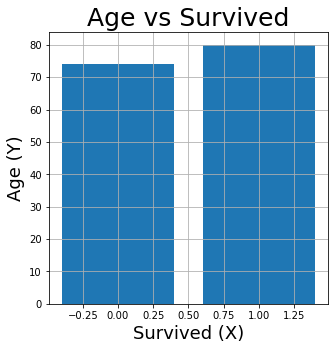

In [154]:
fig = plt.figure(figsize=(5,5))
plt.bar(t_data['Survived'], t_data['Age'])
plt.grid()
plt.xlabel('Survived (X)', fontsize=18)
plt.ylabel('Age (Y)', fontsize=18)
plt.title('Age vs Survived', fontsize=25)
plt.show()

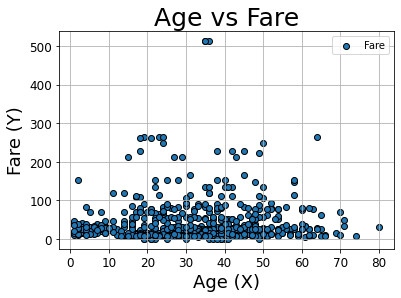

In [155]:
fig = plt.figure()
plt.scatter(t_data['Age'], t_data['Fare'],edgecolor='black', label='Fare')
plt.grid()
plt.xlabel('Age (X)', fontsize=18)
plt.ylabel('Fare (Y)', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Age vs Fare', fontsize=25)
plt.legend(loc='upper right')
plt.show()

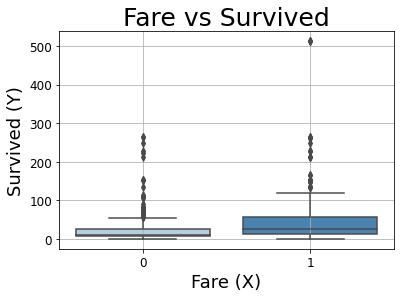

In [156]:
fig = plt.figure()
ax = sb.boxplot(x="Survived", y="Fare", data=t_data , palette="Blues")
plt.grid()
plt.xlabel('Fare (X)', fontsize=18)
plt.ylabel('Survived (Y)', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Fare vs Survived', fontsize=25)
plt.show()

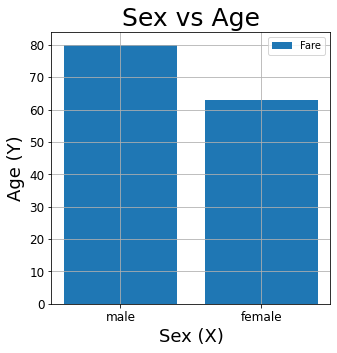

In [157]:
fig = plt.figure(figsize=(5,5))
plt.bar(t_data['Sex'], t_data['Age'], label='Fare')
plt.grid()
plt.xlabel('Sex (X)', fontsize=18)
plt.ylabel('Age (Y)', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Sex vs Age', fontsize=25)
plt.legend(loc='upper right')
plt.show()

<Figure size 432x288 with 0 Axes>

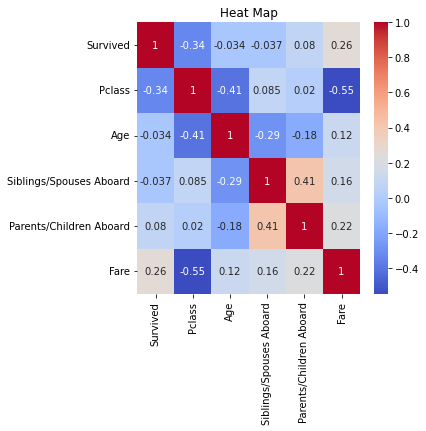

In [158]:
fig=plt.figure()
fig,ax1=plt.subplots(figsize=(5,5))
ax1.set_title("Heat Map")
corr_matrix=t_data.corr()
#print(corr_matrix)
correlation_heat_map=sb.heatmap(corr_matrix,annot=True,cmap="coolwarm")



<h3>'WINE QUALITY' DATASET</h3>

In [160]:
wine_data=pd.read_csv("~/downloads/datasets_/winequality-red.csv")

<h3> I. Statistics about wine quality dataset</h3>

In [161]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [162]:
wine_data.info()
wine_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


(1599, 12)

In [163]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<h3> II. Cleaning WineQuality data.</h3>

In [164]:
wine_data.isnull().sum(axis=0)

for i in wine_data.columns:
    if all(wine_data[i]>=0):
        pass
    else:
        print("Has -ve values")


        

<h3> III. Visualizations for WineQuality Dataset.</h3>

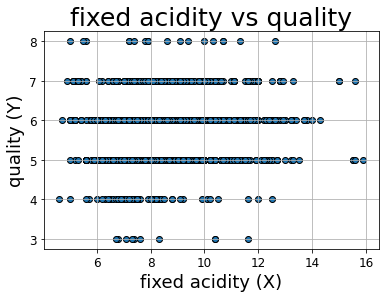

In [165]:
fig = plt.figure()
plt.scatter(wine_data['fixed acidity'], wine_data['quality'],edgecolor='black')
plt.grid()
plt.xlabel('fixed acidity (X)', fontsize=18)
plt.ylabel('quality (Y)', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('fixed acidity vs quality', fontsize=25)
plt.show()

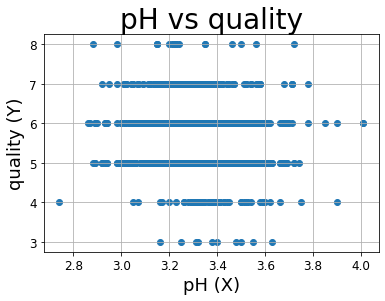

In [166]:
fig = plt.figure()
plt.scatter(wine_data['pH'], wine_data['quality'])
plt.grid()
plt.xlabel('pH (X)', fontsize=18)
plt.ylabel('quality (Y)', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('pH vs quality', fontsize=28)
plt.show()

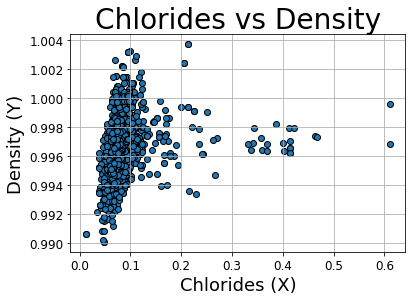

In [167]:
fig = plt.figure()
plt.scatter(wine_data['chlorides'], wine_data['density'],edgecolor='black')
plt.grid()
plt.xlabel('Chlorides (X)', fontsize=18)
plt.ylabel('Density (Y)', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Chlorides vs Density', fontsize=28)
plt.show()

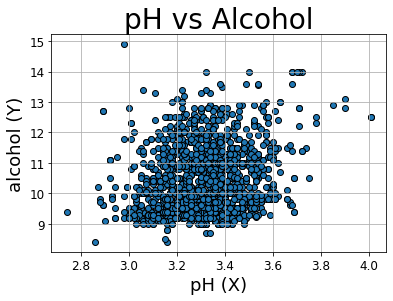

In [168]:
fig = plt.figure()
plt.scatter(wine_data['pH'], wine_data['alcohol'],edgecolor='black')
plt.grid()
plt.xlabel('pH (X)', fontsize=18)
plt.ylabel('alcohol (Y)', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('pH vs Alcohol', fontsize=28)
plt.show()

<Figure size 432x288 with 0 Axes>

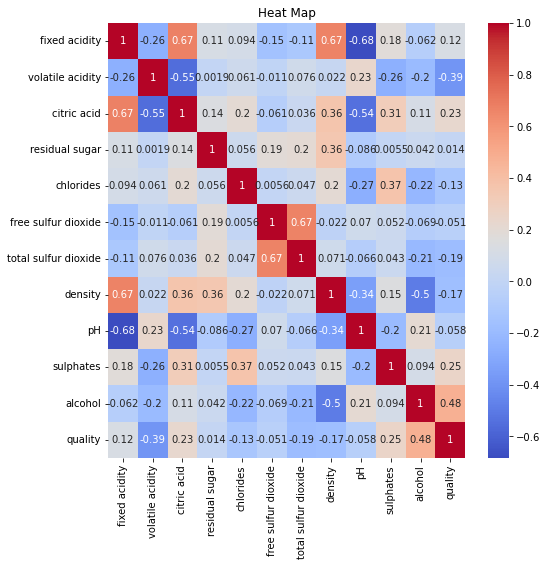

In [169]:
fig=plt.figure()
fig,ax2=plt.subplots(figsize=(8,8))
ax2.set_title("Heat Map")
corr_matrix=wine_data.corr()
#print(corr_matrix)
correlation_heat_map=sb.heatmap(corr_matrix,annot=True,cmap="coolwarm")

<h3>'INSURENCE' DATSET</h3>

In [170]:
insure_data=pd.read_csv("~/downloads/datasets_/insurance.csv")

<h3>I. More statistics about Insurance dataset</h3> 

In [171]:
insure_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [172]:
insure_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [173]:
insure_data.shape

(1338, 7)

In [174]:
insure_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<h3> II. Data Cleaning</h3>

In [175]:
insure_data['sex']=insure_data['sex'].astype('category')
insure_data['region']=insure_data['region'].astype('category')
insure_data['smoker']=insure_data['smoker'].astype('category')
insure_data.isnull().sum(axis=0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [176]:
p=insure_data['age']
for i in range(len(insure_data['age'])):
    try:
        if p[i]<0 or str(p[i]).split('.')[1]!='0':
            insure_data.loc[i,'age']=np.median(insure_data['age'])
    except:
        pass
q=insure_data['children']

for i in range(len(insure_data['children'])):
    try:
        if q[i]<0 or str(q[i]).split('.')[1]!='0':
            insure_data.loc[i,'children']=np.median(insure_data['children'])
    except:
        pass

<h3> III. Visualizations for Insurance dataset</h3>

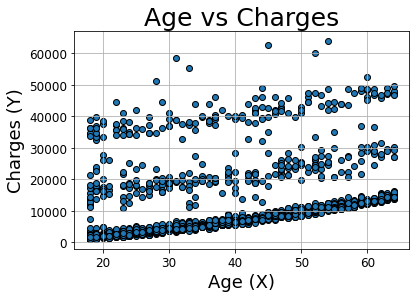

In [177]:
fig = plt.figure()
plt.scatter(insure_data['age'], insure_data['charges'],edgecolor='black')
plt.grid()
plt.xlabel('Age (X)', fontsize=18)
plt.ylabel('Charges (Y)', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Age vs Charges', fontsize=25)
plt.show()

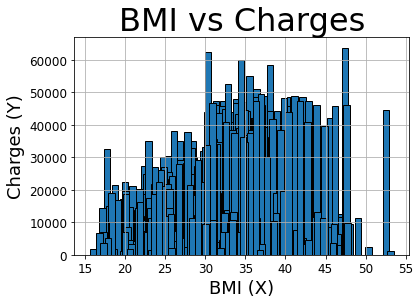

In [178]:
fig = plt.figure()
plt.bar(insure_data['bmi'], insure_data['charges'],edgecolor="black")
plt.grid()
plt.xlabel('BMI (X)', fontsize=18)
plt.ylabel('Charges (Y)', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('BMI vs Charges', fontsize=32)
plt.show()

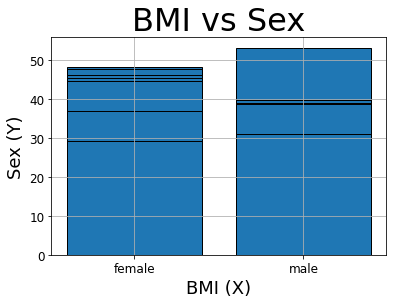

In [179]:
fig = plt.figure()
plt.bar(insure_data['sex'], insure_data['bmi'],edgecolor="black")
plt.grid()
plt.xlabel('BMI (X)', fontsize=18)
plt.ylabel('Sex (Y)', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('BMI vs Sex', fontsize=32)
plt.show()

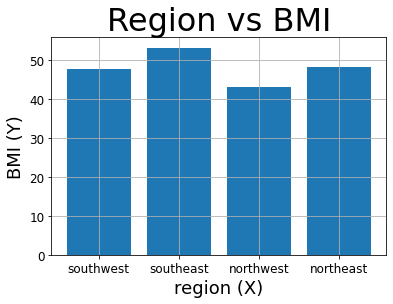

In [180]:
fig = plt.figure()
plt.bar(insure_data['region'], insure_data['bmi'])
plt.grid()
plt.xlabel('region (X)', fontsize=18)
plt.ylabel('BMI (Y)', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Region vs BMI', fontsize=32)
plt.show()

<Figure size 432x288 with 0 Axes>

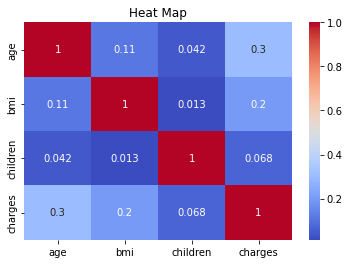

In [181]:
fig=plt.figure()
fig,ax2=plt.subplots()
ax2.set_title("Heat Map")
corr_matrix=insure_data.corr()
#print(corr_matrix)
correlation_heat_map=sb.heatmap(corr_matrix,annot=True,cmap="coolwarm")

References
1. https://www.w3schools.com/python/pandas/default.asp
2. https://www.w3schools.com/python/pandas/default.asp